# BUAN 6341.0U1-Applied Machine Learning 

## Group Members
### Group No. - 20
### txd180011 - Taniya Dhar
### pas180003 - Priyanka Savant

# PROJECT DESCRIPTION

Source of the dataset : Personal Loan Dataset has been taken from Kaggle.

Objective : Build a model that will help them identify the potential customers who have a higher probability of purchasing the loan.

Features : Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortage, Personal Loan, Securities Account, CD Account, Online , CreditCard
Target Value : PersonalLoan

#### Column Description

ID : Customer ID
Age : Customer's age in completed years
Experience : Number of years of professional experience
Income : Annual income of the customer (USD 1000)
ZIPCode : Home Address ZIP code.
Family : Family size of the customer
CCAvg : Avg. spending on credit cards per month (USD 1000)
Education Education Level : 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage :  Value of house mortgage if any. (USD 1000)
Personal Loan : Did this customer accept the personal loan offered in the last campaign?
Securities Account : Does the customer have a securities account with the bank?
CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
Online : Does the customer use internet banking facilities?
CreditCard : Does the customer uses a credit card issued by UniversalBank?

# CLASSIFICATION

## Import the required packages to build classification models




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#train and test split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#KNN Classification
from sklearn.neighbors import KNeighborsClassifier

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Confusion matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

#Support Vector Machine
from sklearn.svm import SVC, LinearSVC
from sklearn import svm

#Grid Search CV
from sklearn.model_selection import GridSearchCV

#Kernalize Support Vector
import matplotlib.gridspec as gridspec
import itertools

#Decision Boundary
from mlxtend.plotting import plot_decision_regions


#Project2 IMPORTANT lIBRARIES

#VotingClassifier
from sklearn.ensemble import VotingClassifier

#BaggingClassifier
from sklearn.ensemble import BaggingClassifier

%matplotlib inline

# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# PCA
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the Personal Loan dataset in Python

In [3]:
data = pd.read_csv('personalloan.csv')

In [4]:
data.head(10) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,PersonalLoan
0,1,25,1,49,91107,4,1.6,1,0,Yes,No,No,No,No
1,2,45,19,34,90089,3,1.5,1,0,Yes,No,No,No,No
2,3,39,15,11,94720,1,1,1,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,2,0,No,No,No,No,No
4,5,35,8,45,91330,4,1,2,0,No,No,No,Yes,No
5,6,37,13,29,92121,4,0.4,2,155,No,No,Yes,No,No
6,7,53,27,72,91711,2,1.5,2,0,No,No,Yes,No,No
7,8,50,24,22,93943,1,0.3,3,0,No,No,No,Yes,No
8,9,35,10,81,90089,3,0.6,2,104,No,No,Yes,No,No
9,10,34,9,180,93023,1,8.9,3,0,No,No,No,No,Yes


In [5]:
data.shape

(5030, 14)

# Detect Missing Values

In [6]:
print((data[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'PersonalLoan']] == '?').sum())

ID                     0
Age                    0
Experience            10
Income                14
ZIP Code               0
Family                 3
CCAvg                  4
Education              0
Mortgage               0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
PersonalLoan           0
dtype: int64


In [7]:
data[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'PersonalLoan']] = data[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'PersonalLoan']].replace('?',np.NaN)

In [8]:
data[['Experience']] = data[['Experience']].replace('?',np.NaN)

In [9]:
print(data.isnull().sum())

ID                     0
Age                    0
Experience            10
Income                14
ZIP Code               0
Family                 3
CCAvg                  4
Education              0
Mortgage               0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
PersonalLoan           0
dtype: int64


In [10]:
data = data.dropna()

In [11]:
print(data.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
PersonalLoan          0
dtype: int64


In [12]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,PersonalLoan
0,1,25,1,49,91107,4,1.6,1,0,Yes,No,No,No,No
1,2,45,19,34,90089,3,1.5,1,0,Yes,No,No,No,No
2,3,39,15,11,94720,1,1,1,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,2,0,No,No,No,No,No
4,5,35,8,45,91330,4,1,2,0,No,No,No,Yes,No
5,6,37,13,29,92121,4,0.4,2,155,No,No,Yes,No,No
6,7,53,27,72,91711,2,1.5,2,0,No,No,Yes,No,No
7,8,50,24,22,93943,1,0.3,3,0,No,No,No,Yes,No
8,9,35,10,81,90089,3,0.6,2,104,No,No,Yes,No,No
9,10,34,9,180,93023,1,8.9,3,0,No,No,No,No,Yes


# Initial Data Analysis

In [13]:
data.shape

(5000, 14)

In [14]:
# Shape of training and test data set
def dataframe_shape(df):
    print("The dataframe has %d rows" %df.shape[0])
    print("The dataframe has %d columns" %df.shape[1])
dataframe_shape(data)

The dataframe has 5000 rows
The dataframe has 14 columns


In [15]:
# Columns/Feature in dataset
pd.DataFrame(data.columns,index=None,copy=False).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,PersonalLoan


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5019
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null object
Income                5000 non-null object
ZIP Code              5000 non-null int64
Family                5000 non-null object
CCAvg                 5000 non-null object
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null object
CD Account            5000 non-null object
Online                5000 non-null object
CreditCard            5000 non-null object
PersonalLoan          5000 non-null object
dtypes: int64(5), object(9)
memory usage: 585.9+ KB
None


In [17]:
print(data.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
PersonalLoan          0
dtype: int64


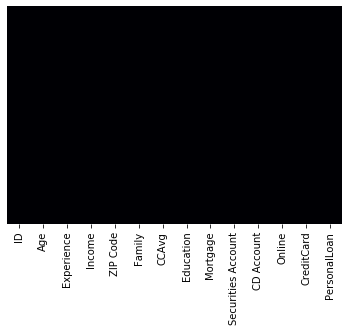

In [18]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='magma')

In [19]:
# There are no missing values in the dataset

In [20]:
data.dtypes

ID                     int64
Age                    int64
Experience            object
Income                object
ZIP Code               int64
Family                object
CCAvg                 object
Education              int64
Mortgage               int64
Securities Account    object
CD Account            object
Online                object
CreditCard            object
PersonalLoan          object
dtype: object

In [21]:
#Irregular value analysis

In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5040,1443.526959,1.0,1250.75,2500.5,3750.25,5020.0
Age,5000.0,45.3424,11.460603,23.0,35.00,45.0,55.00,67.0
ZIP Code,5000.0,93152.1240,2122.117983,9307.0,91911.00,93437.0,94608.00,96651.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0


In [23]:
# change your column names
data.columns = [c.replace(' ', '_') for c in data.columns]

In [24]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'PersonalLoan'],
      dtype='object')

In [25]:
# need to convert Securities Account, CD Account , Online, CreditCard,PersonalLoan from object to Binary 0 or 1


In [26]:
data['Online'] = data['Online'].map({'Yes':1, 'No':0})

In [27]:
data['CreditCard'] = data['CreditCard'].map({'Yes':1, 'No':0})

In [28]:
data['PersonalLoan'] = data['PersonalLoan'].map({'Yes':1, 'No':0})

In [29]:
data['CD_Account'] = data['CD_Account'].map({'Yes':1, 'No':0})

In [30]:
data['Securities_Account'] = data['Securities_Account'].map({'Yes':1, 'No':0})

In [31]:
data.dtypes

ID                     int64
Age                    int64
Experience            object
Income                object
ZIP_Code               int64
Family                object
CCAvg                 object
Education              int64
Mortgage               int64
Securities_Account     int64
CD_Account             int64
Online                 int64
CreditCard             int64
PersonalLoan           int64
dtype: object

In [32]:
# Columns/Feature in dataset
pd.DataFrame(data.columns,index=None,copy=False).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,PersonalLoan


In [33]:
#finding unique data
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              48
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
PersonalLoan             2
dtype: int64

The dataset contains 
4519:No ;   480 :Yes


So, it is an Imbalanced Dataset

# Exploratory Data Analysis

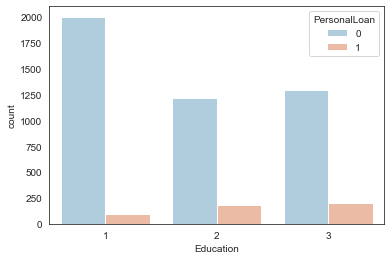

In [34]:
sns.set_style('white')
sns.countplot(data=data,x='Education',hue='PersonalLoan',palette='RdBu_r')

In [35]:
# Most of the loan applicants are professionals

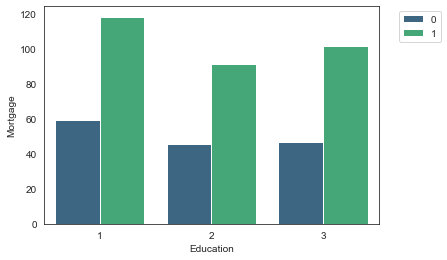

In [36]:
sns.barplot('Education','Mortgage',hue='PersonalLoan',data=data,palette='viridis',ci=None)
plt.legend(bbox_to_anchor=(1.2,1))

In [37]:
# The value of house mortagage for the non-applicants is much lower than that of applicants. This could be a possible reason for them not applying for a loan or not finding a policy based on there need.

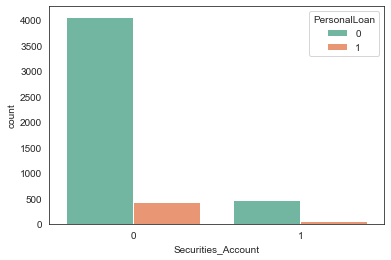

In [38]:
sns.set_style('white')
sns.countplot(data=data,x='Securities_Account',hue='PersonalLoan',palette='Set2')

It is clear that very few loan applicants have a securities account.

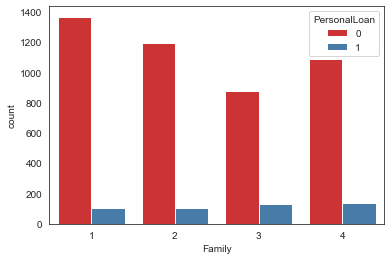

In [39]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

Family size does not have any impact in personal loan. But,it seems families with size of 3 are more likely to take loan. 

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,PersonalLoan
0,int64,int64,object,object,int64,object,object,int64,int64,int64,int64,int64,int64,int64


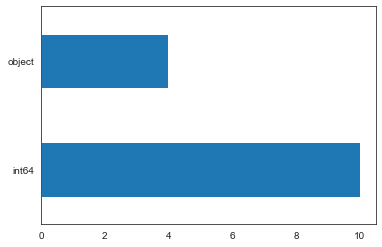

In [40]:
# datatypes present into training dataset

def datatypes_insight(data):
    display(data.dtypes.to_frame().T)
    data.dtypes.value_counts().plot(kind="barh")

datatypes_insight(data)

###### Bi-Variate Analysis - With Pivot Table for Catagorical variable:

In [41]:
data[['CreditCard', 'PersonalLoan']].groupby(['CreditCard'], as_index=False).mean().sort_values(by='PersonalLoan', ascending=False)

,CreditCard,PersonalLoan
1,1,0.097279
0,0,0.095467


In [42]:
data[['Online', 'PersonalLoan']].groupby(['Online'], as_index=False).mean().sort_values(by='PersonalLoan', ascending=False)

,Online,PersonalLoan
1,1,0.09752
0,0,0.09375


In [43]:
data[['Family', 'PersonalLoan']].groupby(['Family'], as_index=False).mean().sort_values(by='PersonalLoan', ascending=False)

,Family,PersonalLoan
2,3,0.131814
3,4,0.109656
1,2,0.081790
0,1,0.072641


In [44]:
data[['Education', 'PersonalLoan']].groupby(['Education'], as_index=False).mean().sort_values(by='PersonalLoan', ascending=False)

,Education,PersonalLoan
2,3,0.136576
1,2,0.129722
0,1,0.044370


In [45]:
data[['CD_Account', 'PersonalLoan']].groupby(['CD_Account'], as_index=False).mean().sort_values(by='PersonalLoan', ascending=False)

,CD_Account,PersonalLoan
1,1,0.463576
0,0,0.072371


In [46]:
data[['Securities_Account', 'PersonalLoan']].groupby(['Securities_Account'], as_index=False).mean().sort_values(by='PersonalLoan', ascending=False)

,Securities_Account,PersonalLoan
1,1,0.114943
0,0,0.093792


## Feature correlation analysis

In [47]:
feature = data.drop(["ID","PersonalLoan"],axis=1)
target = data["PersonalLoan"]

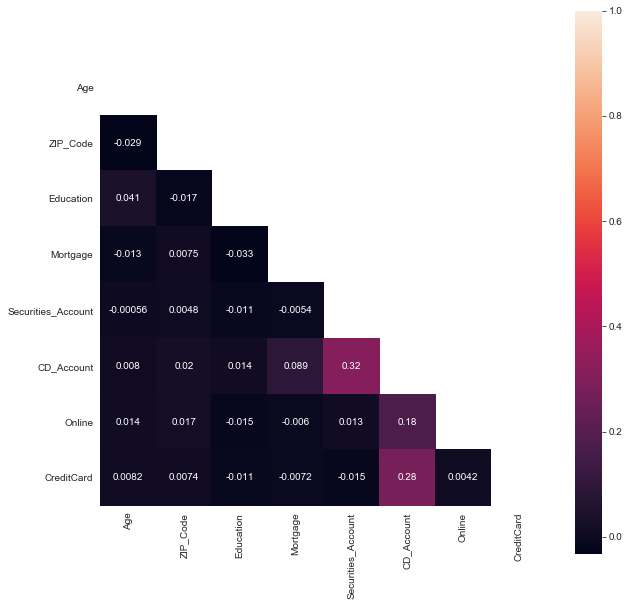

In [48]:
corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

# Splitting Train and Test Set


In [49]:
# Feature name
X = pd.DataFrame(data, columns = ["Age","Experience","Income","ZIP_Code","Family","Education","Mortgage","Securities_Account","CD_Account","Online","CreditCard"])
X

,Age,Experience,Income,ZIP_Code,Family,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1,0,1,0,0,0
1,45,19,34,90089,3,1,0,1,0,0,0
2,39,15,11,94720,1,1,0,0,0,0,0
3,35,9,100,94112,1,2,0,0,0,0,0
4,35,8,45,91330,4,2,0,0,0,0,1
5,37,13,29,92121,4,2,155,0,0,1,0
6,53,27,72,91711,2,2,0,0,0,1,0
7,50,24,22,93943,1,3,0,0,0,0,1
8,35,10,81,90089,3,2,104,0,0,1,0
9,34,9,180,93023,1,3,0,0,0,0,0


In [50]:
#Target name
y = pd.DataFrame(data, columns = ["PersonalLoan"])
y

,PersonalLoan
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [51]:
X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

# Scaling

#### Scaling and Justification for type of scaling used

The scaling method we used is Standard Scaler as there is no outliers.
Most of the values in each column is very small,the data would unnecessarily be skewed if we use min-max scaling.

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with AdaBoost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

# Task 1: Two Voting Classifiers

### Hard Voting

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score, precision_score, f1_score

In [54]:
param_grid={'n_neighbors':range(1,10)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring='precision')
grid_search_knn.fit(X_train,y_train)

param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_log = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True, scoring='precision')
grid_search_log.fit(X_train,y_train)

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search_SVC = GridSearchCV(SVC(kernel = 'rbf',probability = True),param_grid, cv=5, return_train_score=True,scoring='precision');
grid_search_SVC.fit(X_train, y_train)

voting_clf = VotingClassifier(
    estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('svc', grid_search_SVC)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='warn',
                                                                        n_jobs=None,
                                                  

In [55]:
from sklearn.metrics import precision_score
for clf in (grid_search_log, grid_search_knn, grid_search_SVC, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))

GridSearchCV 0.8846153846153846
GridSearchCV 0.9838709677419355
GridSearchCV 1.0
VotingClassifier 1.0


### Soft Voting

In [56]:
from sklearn.model_selection import KFold
param_grid={'n_neighbors':range(1,10)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring='precision')
grid_search_knn.fit(X_train,y_train)
# k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='').mean()

param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_log = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True, scoring='precision')
grid_search_log.fit(X_train,y_train)
# k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='').mean()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search_SVC = GridSearchCV(SVC(kernel= 'rbf',probability = True),param_grid, cv=5, return_train_score=True,scoring='precision');
grid_search_SVC.fit(X_train, y_train)

# test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='').mean();

voting_clf_soft = VotingClassifier(estimators=[('lr', grid_search_log), ('knn', grid_search_knn), ('svc', grid_search_SVC)],
                                   voting = 'soft')
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='warn',
                                                                        n_jobs=None,
                                                  

In [57]:
for clf in (grid_search_log, grid_search_knn, grid_search_SVC, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))

GridSearchCV 0.8846153846153846
GridSearchCV 0.9838709677419355
GridSearchCV 1.0
VotingClassifier 0.9629629629629629


# Task 2 : Two models with Bagging and Pasting

Bagging attempts to reduce the chance overfitting complex models

The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner. Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement.

### Bagging 1: Logistic regression

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(LogisticRegression(C=0.01, penalty='l1'),bootstrap=True,oob_score=True,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=0.01,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l1',
                                          

In [60]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 50, 'n_estimators': 100}


In [61]:
from sklearn.svm import LinearSVC
bag_class = BaggingClassifier(LinearSVC(C=250), n_estimators=100, max_samples=50, bootstrap=True,oob_score=True,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)
oob = bag_class.oob_score_

In [62]:
print(btr_score)
print(bte_score)
print(oob)

0.9464
0.9592
0.9461333333333334


### Bagging 2:  SVC -RBF

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(SVC(kernel='rbf',C=0.1,gamma= 0.1),bootstrap=True,oob_score=True,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=SVC(C=0.1,
                                                            cache_size=200,
                                                            class_weight=None,
                                                            coef0=0.0,
                                                            decision_function_shape='ovr',
                                                            degree=3, gamma=0.1,
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            probability=False,
                                                            random_state=None,
                                                            shrinking=True,
                                                            tol=0.001,
                               

In [64]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 50, 'n_estimators': 100}


In [65]:
from sklearn.svm import SVC
bag_class = BaggingClassifier(SVC(kernel='linear',C=250), n_estimators=100, max_samples=200, bootstrap=True,oob_score=True,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)
oob = bag_class.oob_score_

In [66]:
print(btr_score)
print(bte_score)
print(oob)

0.9504
0.96
0.9482666666666667


# Pasting

### Pasting 1: SVC RBF Kernel

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(SVC(kernel='rbf',C= 0.1, gamma = 0.1),bootstrap=False,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=SVC(C=0.1,
                                                            cache_size=200,
                                                            class_weight=None,
                                                            coef0=0.0,
                                                            decision_function_shape='ovr',
                                                            degree=3, gamma=0.1,
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            probability=False,
                                                            random_state=None,
                                                            shrinking=True,
                                                            tol=0.001,
                               

In [68]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 50, 'n_estimators': 100}


In [69]:
from sklearn.svm import SVC
bag_class = BaggingClassifier(SVC(kernel='rbf',C= 0.1, gamma = 0.1), n_estimators=100, max_samples=150, bootstrap=False,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)

In [70]:
print(btr_score)
print(bte_score)

0.9008
0.9136


### Pasting 2: Decision Tree

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,250,500],'max_samples':[50,75,100,150,200]}

grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth = 4),bootstrap=False,random_state=0), param_grid, cv=3, return_train_score=True )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=4,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                      

In [72]:
print("parameters",grid_search.best_params_)

parameters {'max_samples': 200, 'n_estimators': 100}


In [73]:
from sklearn.tree import DecisionTreeClassifier
bag_class = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=150, bootstrap=False,random_state=0)
bag_class.fit(X_train,y_train)
btr_score = bag_class.score(X_train,y_train)
bte_score = bag_class.score(X_test,y_test)

In [74]:
print(btr_score)
print(bte_score)

0.9794666666666667
0.9824


# Task 3: 2 models with AdaBoost

### Adaboost 1: SVC Kernel Poly

In [75]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV

n_estimators_val = [10, 50, 100,200]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)

ada_reg = AdaBoostClassifier(SVC(kernel='poly',C= 500, degree = 1),algorithm="SAMME", random_state=0)

adaboost_classifier = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_classifier.fit(X_train, y_train)
print ('Best Parameters: ',adaboost_classifier.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 10}


In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(SVC(kernel='poly',C= 500, degree = 1), n_estimators=100, algorithm="SAMME", learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=500, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=1, gamma='auto_deprecated',
                                      kernel='poly', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1, n_estimators=100, random_state=0)

In [77]:
adtr_score = ada_clf.score(X_train,y_train)
adte_score = ada_clf.score(X_test,y_test)

In [78]:
print(adtr_score)
print(adte_score)

0.9450666666666667
0.9552


### Adaboost 2: Decision Tree Classifier

In [79]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV

n_estimators_val = [10, 50, 100,200]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)

ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME.R", random_state=0)

adaboost_classifier = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_classifier.fit(X_train, y_train)
print ('Best Parameters: ',adaboost_classifier.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 10}


In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, algorithm="SAMME.R",learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)
adtr_score = ada_clf.score(X_train,y_train)
adte_score = ada_clf.score(X_test,y_test)

In [81]:
print(adtr_score)
print(adte_score)

1.0
0.976


# Task 4: Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_val = [50, 100, 200, 500]
learning_rate_val = [0.01, 0.1, 0.5, 1]
max_depth_val = [1, 2, 3, 4]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val, max_depth=max_depth_val)
gbrg = GradientBoostingClassifier(random_state=0)

gradientboost_classifier = GridSearchCV(estimator=gbrg, param_grid=param_grid)
gradientboost_classifier.fit(X_train, y_train)

print (gradientboost_classifier.best_params_)
print('Train score: {:.2f}'.format(gradientboost_classifier.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gradientboost_classifier.score(X_test, y_test)))

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Train score: 0.98
Test score: 0.98


# Additional Model- Random Forest 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [25,50,100,200,300,400,500]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True,scoring='precision');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='precision').mean();

In [84]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9845896047307812
Test 1.0
parameters {'n_estimators': 50}


# Classification Post PCA

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.97)
pca.fit(X_train)
pca.n_components_

10

In [86]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
kfold =KFold(n_splits=5, random_state=0)

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='precision')
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='precision').mean()

In [88]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.9612421891833657
Test 0.9318181818181819
parameters {'n_neighbors': 6}


### Adding results to post_pca_class(post_pca_classification_results)

In [89]:
post_pca_class = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score'))

In [90]:
post_pca_class.loc[len(post_pca_class)]=[1,'KNN Classifier',grid_search.best_params_,grid_search.best_score_,k_test]

In [91]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818


In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

In [93]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1139    3]
 [  70   38]]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      1142
         Yes       0.93      0.35      0.51       108

    accuracy                           0.94      1250
   macro avg       0.93      0.67      0.74      1250
weighted avg       0.94      0.94      0.93      1250



# Logistic Model

In [94]:
from sklearn.linear_model import LogisticRegression
kfold =KFold(n_splits=5, random_state=0)
param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='precision')
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold,scoring='precision').mean()

In [95]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.880406356749146
Test 0.9282352941176472
parameters {'C': 0.01, 'penalty': 'l2'}


In [96]:
post_pca_class.loc[len(post_pca_class)]=[2,'Logistic Model',grid_search.best_params_,grid_search.best_score_,k_test]

In [97]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818
1,2,Logistic Model,"{'C': 0.01, 'penalty': 'l2'}",0.880406,0.928235


In [98]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

In [99]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1138    4]
 [  57   51]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1142
         Yes       0.93      0.47      0.63       108

    accuracy                           0.95      1250
   macro avg       0.94      0.73      0.80      1250
weighted avg       0.95      0.95      0.94      1250



# Linear SVC

In [100]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True,scoring='precision');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='precision').mean();

In [101]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.883583447956536
Test 0.9142483660130718
parameters {'C': 0.01}


In [102]:
post_pca_class.loc[len(post_pca_class)]=[3,'Linear SVC',grid_search.best_params_,grid_search.best_score_,test]

In [103]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818
1,2,Logistic Model,"{'C': 0.01, 'penalty': 'l2'}",0.880406,0.928235
2,3,Linear SVC,{'C': 0.01},0.883583,0.914248


In [104]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

In [105]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1137    5]
 [  56   52]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1142
         Yes       0.91      0.48      0.63       108

    accuracy                           0.95      1250
   macro avg       0.93      0.74      0.80      1250
weighted avg       0.95      0.95      0.94      1250



# SVC - Kernel Trick

In [106]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True,scoring='precision');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='precision').mean();

In [107]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9277588086331496
Test 0.9541666666666666
parameters {'C': 0.01}


In [108]:
post_pca_class.loc[len(post_pca_class)]=[4,'SVC - Kernel Trick',grid_search.best_params_,grid_search.best_score_,test]

In [109]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818
1,2,Logistic Model,"{'C': 0.01, 'penalty': 'l2'}",0.880406,0.928235
2,3,Linear SVC,{'C': 0.01},0.883583,0.914248
3,4,SVC - Kernel Trick,{'C': 0.01},0.927759,0.954167


In [110]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

In [111]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1139    3]
 [  51   57]]
              precision    recall  f1-score   support

          No       0.96      1.00      0.98      1142
         Yes       0.95      0.53      0.68       108

    accuracy                           0.96      1250
   macro avg       0.95      0.76      0.83      1250
weighted avg       0.96      0.96      0.95      1250



In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True,scoring='precision');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='precision').mean();

In [113]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 1.0
Test 0.9571428571428571
parameters {'C': 0.1, 'gamma': 0.1}


In [114]:
post_pca_class.loc[len(post_pca_class)]=[5,'SVC - RBF',grid_search.best_params_,grid_search.best_score_,test]

In [115]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818
1,2,Logistic Model,"{'C': 0.01, 'penalty': 'l2'}",0.880406,0.928235
2,3,Linear SVC,{'C': 0.01},0.883583,0.914248
3,4,SVC - Kernel Trick,{'C': 0.01},0.927759,0.954167
4,5,SVC - RBF,"{'C': 0.1, 'gamma': 0.1}",1.000000,0.957143


In [116]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

In [117]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1139    3]
 [  62   46]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1142
         Yes       0.94      0.43      0.59       108

    accuracy                           0.95      1250
   macro avg       0.94      0.71      0.78      1250
weighted avg       0.95      0.95      0.94      1250



In [118]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, return_train_score=True,scoring='precision');

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5,scoring='precision').mean();

In [119]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9777789768654285
Test 0.7636363636363637
parameters {'C': 0.1, 'degree': 2}


In [120]:
post_pca_class.loc[len(post_pca_class)]=[6,'Linear SVC - Polynomial Kernel',grid_search.best_params_,grid_search.best_score_,test]

In [121]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818
1,2,Logistic Model,"{'C': 0.01, 'penalty': 'l2'}",0.880406,0.928235
2,3,Linear SVC,{'C': 0.01},0.883583,0.914248
3,4,SVC - Kernel Trick,{'C': 0.01},0.927759,0.954167
4,5,SVC - RBF,"{'C': 0.1, 'gamma': 0.1}",1.000000,0.957143
5,6,Linear SVC - Polynomial Kernel,"{'C': 0.1, 'degree': 2}",0.977779,0.763636


In [122]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

In [123]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1138    4]
 [  65   43]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1142
         Yes       0.91      0.40      0.55       108

    accuracy                           0.94      1250
   macro avg       0.93      0.70      0.76      1250
weighted avg       0.94      0.94      0.93      1250



# Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
dt_tr_sc=cross_val_score(tree, X_train, y_train, cv=5,scoring ='precision').mean()
dt_te_sc=cross_val_score(tree, X_test, y_test, cv=5,scoring='precision').mean()
print(dt_tr_sc)
print(dt_te_sc)

0.7205289882531262
0.7142971064023695


In [125]:
post_pca_class.loc[len(post_pca_class)]=[7,'Decision Tree Classifier',"None",dt_tr_sc,dt_te_sc]

In [126]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818
1,2,Logistic Model,"{'C': 0.01, 'penalty': 'l2'}",0.880406,0.928235
2,3,Linear SVC,{'C': 0.01},0.883583,0.914248
3,4,SVC - Kernel Trick,{'C': 0.01},0.927759,0.954167
4,5,SVC - RBF,"{'C': 0.1, 'gamma': 0.1}",1.000000,0.957143
5,6,Linear SVC - Polynomial Kernel,"{'C': 0.1, 'degree': 2}",0.977779,0.763636
6,7,Decision Tree Classifier,None,0.720529,0.714297


In [127]:
from sklearn.metrics import confusion_matrix
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
confusion = confusion_matrix(y_test, predicted)

In [128]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1138    4]
 [  65   43]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1142
         Yes       0.91      0.40      0.55       108

    accuracy                           0.94      1250
   macro avg       0.93      0.70      0.76      1250
weighted avg       0.94      0.94      0.93      1250



In [129]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,{'n_neighbors': 6},0.961242,0.931818
1,2,Logistic Model,"{'C': 0.01, 'penalty': 'l2'}",0.880406,0.928235
2,3,Linear SVC,{'C': 0.01},0.883583,0.914248
3,4,SVC - Kernel Trick,{'C': 0.01},0.927759,0.954167
4,5,SVC - RBF,"{'C': 0.1, 'gamma': 0.1}",1.000000,0.957143
5,6,Linear SVC - Polynomial Kernel,"{'C': 0.1, 'degree': 2}",0.977779,0.763636
6,7,Decision Tree Classifier,None,0.720529,0.714297


# Does PCA help in getting better results?

#1.Before PCA in Project 1, the best model was the Decision Tree Classifier Decision Tree Classifier Train score of 0.98 and Test score of 1.00
#2.After PCA, the best model was KNN with a train score of 0.96 and a test score of 0.93.
#3.There seems to be a marginal improvement in some of the models after PCA but there also seems to be a decrease in some models. So we cannot conlusively say that PCA helps in getting better results.

# 1. Perceptron

In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [131]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 10, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))
#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

Instructions for updating:
Colocations handled automatically by placer.


In [132]:
#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 75, batch_size = 200);

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
3750/3750 [==============================] - 0s 48us/sample - loss: 0.7405 - acc: 0.5136
Epoch 2/75
3750/3750 [==============================] - 0s 5us/sample - loss: 0.6488 - acc: 0.6152
Epoch 3/75
3750/3750 [==============================] - 0s 5us/sample - loss: 0.5747 - acc: 0.7088
Epoch 4/75
3750/3750 [==============================] - 0s 7us/sample - loss: 0.5160 - acc: 0.7763
Epoch 5/75
3750/3750 [==============================] - 0s 6us/sample - loss: 0.4689 - acc: 0.8219
Epoch 6/75
3750/3750 [==============================] - 0s 5us/sample - loss: 0.4305 - acc: 0.8552
Epoch 7/75
3750/3750 [==============================] - 0s 5us/sample - loss: 0.3989 - acc: 0.8741
Epoch 8/75
3750/3750 [==============================] - 0s 6us/sample - loss: 0.3721 - acc: 0.8877
Epoch 9/75
3750/3750 [==============================] - 0s 7us/sample - loss: 0.3497 - acc: 0.8944
Epoch 10/75
3750/3750 [==============================] - 0s 

### Perceptron Evaluation Metrics

In [133]:
model1.evaluate(X_train, y_train)

3750/3750 [==============================] - 0s 24us/sample - loss: 0.1133 - acc: 0.9627


[0.11331829084555307, 0.9626667]

In [134]:
model1.evaluate(X_test, y_test)

1250/1250 [==============================] - 0s 18us/sample - loss: 0.1103 - acc: 0.9608


[0.11034778512716294, 0.9608]

### Perceptron Prediction Score

In [135]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [136]:

print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.8945578231292517
test 0.8172043010752689


# 2.Multi-Level Perceptron

In [137]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 10, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 100, batch_size = 200);

Epoch 1/100
3750/3750 [==============================] - 0s 68us/sample - loss: 0.4806 - acc: 0.8893
Epoch 2/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.3341 - acc: 0.9008
Epoch 3/100
3750/3750 [==============================] - 0s 6us/sample - loss: 0.2525 - acc: 0.9008
Epoch 4/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.2102 - acc: 0.9008
Epoch 5/100
3750/3750 [==============================] - 0s 6us/sample - loss: 0.1827 - acc: 0.9045
Epoch 6/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.1615 - acc: 0.9285
Epoch 7/100
3750/3750 [==============================] - 0s 8us/sample - loss: 0.1439 - acc: 0.9520
Epoch 8/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.1297 - acc: 0.9576
Epoch 9/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.1166 - acc: 0.9619
Epoch 10/100
3750/3750 [==============================] - 0s 8us/sample - loss: 0.1050 - acc: 0.965

3750/3750 [==============================] - 0s 6us/sample - loss: 0.0324 - acc: 0.9904
Epoch 82/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.0322 - acc: 0.9917
Epoch 83/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.0324 - acc: 0.9901
Epoch 84/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.0318 - acc: 0.9912
Epoch 85/100
3750/3750 [==============================] - 0s 6us/sample - loss: 0.0313 - acc: 0.9912
Epoch 86/100
3750/3750 [==============================] - 0s 6us/sample - loss: 0.0314 - acc: 0.9912
Epoch 87/100
3750/3750 [==============================] - 0s 7us/sample - loss: 0.0307 - acc: 0.9917
Epoch 88/100
3750/3750 [==============================] - 0s 6us/sample - loss: 0.0299 - acc: 0.9915
Epoch 89/100
3750/3750 [==============================] - 0s 6us/sample - loss: 0.0299 - acc: 0.9904
Epoch 90/100
3750/3750 [==============================] - 0s 6us/sample - loss: 0.0297 - acc: 0.9907
Epo

### Multi Layer Perceptron Evaluation Metrics

In [138]:
model1.evaluate(X_train, y_train)

3750/3750 [==============================] - 0s 32us/sample - loss: 0.0256 - acc: 0.9931


[0.025585630522171655, 0.99306667]

In [139]:
model1.evaluate(X_test, y_test)

1250/1250 [==============================] - 0s 24us/sample - loss: 0.0663 - acc: 0.9824


[0.0662737667594396, 0.9824]

### Multi Layer Perceptron Precision Scores

In [140]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [141]:
print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.970108695652174
test 0.9134615384615384


# Conclusion

#Task1.Two Voting Classifiers(with models KNN,Logistic,RBF Kernel)- One with hard voting and one with soft voting were applied.
Hard Voting Classifier Output was 1.00 and Soft Voting Classifier was 0.963
#Task2.Two models with bagging(Logistic Regression,SVC RBF) and two models with pasting(SVC RBF Kernel,Decision Tree Classifier) were applied.
#Task3.Two models with adaboost boosting(SVC Polynomial Kernel Trick,Decision Tree Classifier) were applied.
#Task4.One model with gradient boosting was applied.
#Task5.The following models were applied before PCA and after PCA:
  #a.KNN Classifier
  #b.Logistic Regression
  #c.Linear SVC
  #d.SVC - 'Linear' Kernel Trick
  #e.SVC - 'Polynomial' Kernel Trick
  #f.SVC - 'RBF' Kernel Trick
  #g.Decision Tree Classifier
  #The results were compared and the explanation of whether PCA yields better results was given.
#Task6.Two Deep Learning models( Perceptron and Multi Layer Perceptron) were applied.